# Non ho voglia di fare integrali
Li faccio fare a un computer

Prendo in input la seguente distribuzione
$$
    \frac{dM_r}{dA_r}(\theta, \phi) = \frac{M_e}{\pi r^2} \cos \theta \cos \phi 
$$

Questa ha il problema di essere una distribuzione data da una sorgente puntiforme. Bisogna evolvere la formula verso una sorgente non puntiforme... questo va pensato. Iniziamo a fare delle considerazioni.

Parto pensando che la superfice ricevente e quella emettente siano parallele, in questo caso si ha che $\theta = \phi$.
Quindi posso ridurre il problema a
$$
    \frac{dM_r}{dA_r}(\theta) = \frac{M_e}{\pi r^2} \cos^2 \theta 
$$

In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

Vado a inserire nel codice le opportune sostituzioni, in questo modo poi ci pensa il computer a fare il lavoro e non io

In [3]:
theta = smp.symbols(r'\theta')
r = smp.symbols('r')
dM_r_dA_r = smp.cos(theta) ** 2 / (smp.pi * r ** 2)
dM_r_dA_r

cos(\theta)**2/(pi*r**2)

Vado a sostituire il valore di d nella distribuzione, infatti per ragioni geometriche vale: 
$$
    d = r \cos \theta
$$

In [4]:
d = smp.symbols('d')
dM_r_dA_r = dM_r_dA_r.subs(r, d/smp.cos(theta))
dM_r_dA_r

cos(\theta)**4/(pi*d**2)

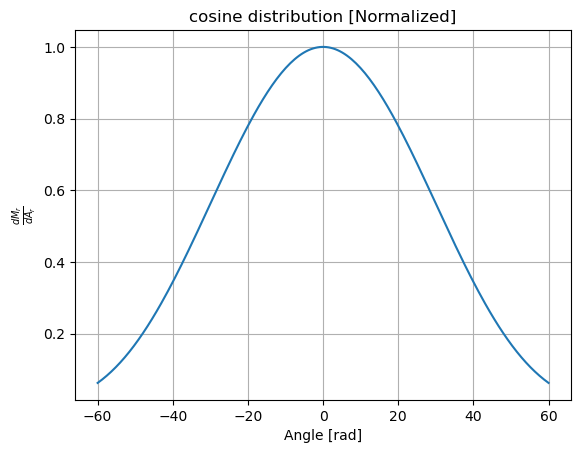

In [5]:
d_meas = 12e-2
angle = np.linspace(- np.pi/3, np.pi/3, 200)
f = smp.lambdify([theta, d], dM_r_dA_r, 'numpy')
res = f(angle, d_meas)
res = res / res.max()
plt.plot(np.degrees(angle), res)
plt.title("cosine distribution [Normalized]")
plt.xlabel("Angle [rad]")
plt.ylabel(r"$\frac{dM_r}{dA_r}$")
plt.grid()